<a href="https://colab.research.google.com/github/Bornitaadhikari/My-Projects/blob/main/BPL_DATA_ANALYSIS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#2.1 Get the file
downloaded = drive.CreateFile({'id':'15YpARiNxayiIwpffWtYDnoU1eQII2nPF'}) # replace the id with id of file you want to access
downloaded.GetContentFile('BPL Data set.csv')

In [ ]:

#3.1 Read file as panda dataframe
import pandas as pd
xyz = pd.read_csv('BPL Data set.csv') 
print(xyz.head(1))

   ID  season   city  ... umpire1 umpire2 umpire3
0   1    2020  Dhaka  ...     NaN     NaN     NaN

[1 rows x 18 columns]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
BPL_df = pd.read_csv('BPL Data set.csv')

In [ ]:
BPL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               89 non-null     int64  
 1   season           89 non-null     int64  
 2   city             89 non-null     object 
 3   date             89 non-null     object 
 4   team1            89 non-null     object 
 5   team2            89 non-null     object 
 6   toss_winner      89 non-null     object 
 7   toss_decision    89 non-null     object 
 8   result           89 non-null     object 
 9   dl_applied       89 non-null     int64  
 10  winner           89 non-null     object 
 11  win_by_runs      88 non-null     float64
 12  win_by_wickets   87 non-null     float64
 13  player_of_match  88 non-null     object 
 14  venue            89 non-null     object 
 15  umpire1          0 non-null      float64
 16  umpire2          0 non-null      float64
 17  umpire3          0

In [ ]:
BPL_df.shape

(89, 18)

In [ ]:
BPL_df

,ID,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2020,Dhaka,11/12/2019,Sylhet Thunder,Chattogram Challengers,Chattogram Challengers,Field,Normal,0,Chattogram Challengers,0.0,5.0,Imrul Kayes,Sher-e-Bangla National Cricket,NaN,NaN,NaN
1,2,2020,Dhaka,11/12/2019,Cumilla Warriors,Rangpur Riders,Cumilla Warriors,Bat,Normal,0,Cumilla Warriors,105.0,0.0,Dasun Shanaka,Sher-e-Bangla National Cricket,NaN,NaN,NaN
2,3,2020,Dhaka,12/12/2019,Dhaka Platoon,Rajshahi Royales,Rajshahi Royales,Field,Normal,0,Rajshahi Royales,0.0,9.0,Ravi Bopara,Sher-e-Bangla National Cricket,NaN,NaN,NaN
3,4,2020,Dhaka,12/12/2019,Chattogram Challengers,Khulna Tighers,Khulna Tighers,Field,Normal,0,Khulna Tighers,0.0,8.0,Rilee Rossouw,Sher-e-Bangla National Cricket,NaN,NaN,NaN
4,5,2020,Dhaka,13/12/2019,Sylhet Thunder,Anamul Haque,Rajshahi Royales,Field,Normal,0,Rajshahi Royales,0.0,5.0,Alok Kapali,Sher-e-Bangla National Cricket,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,85,2016,Chattogram,"19 Nov,2016",DHAKA DYNAMITES,KHULNA TITANS,Khulna Titans,Bat,Normal,0,KHULNA TITANS,9.0,0.0,Mosharraf Hossain,"Zahur Ahmed Chowdhury Stadium, Chattogram",NaN,NaN,NaN
85,86,2016,Dhaka,"6 Dec,2016",CHITTAGONG VIKINGS,RAJSHAHI KINGS,Rajshahi Kings,Field,Normal,0,RAJSHAHI KINGS,0.0,3.0,Daren Sammy,"Shere Bangla National Stadium, Dhaka",NaN,NaN,NaN
86,87,2016,Dhaka,"6 Dec,2016",DHAKA DYNAMITES,KHULNA TITANS,Khulna Titans,Field,Normal,0,DHAKA DYNAMITES,54.0,0.0,Andre Russell,"Sher-e Bangla National Stadium, Dhaka",NaN,NaN,NaN
87,88,2016,Dhaka,"7 Dec,2016",KHULNA TITANS,RAJSHAHI KINGS,Khulna Titans,Bat,Normal,0,RAJSHAHI KINGS,0.0,7.0,Samit Patel,"Sher-e Bangla National Stadium, Dhaka",NaN,NaN,NaN


In [ ]:
#inplace argument is used to make permanent changes in the dataframe
BPL_df.drop(columns=['umpire1','umpire2','umpire3'],inplace=True)

In [ ]:
# Exploring all column names in the data frame
BPL_df.columns

Index(['ID', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [ ]:
# Now lets seasons data we have in our dataframe
# we use .unique() method to list the unique items from the selected column
BPL_df.season.unique()

array([2020, 2019, 2018, 2017, 2016])

In [ ]:
# Now Lets see all the teams that have played so far
BPL_df.team1.unique()

array(['Sylhet Thunder', 'Cumilla Warriors', 'Dhaka Platoon',
       'Chattogram Challengers', 'Rangpur Riders', 'Rajshahi Royales',
       'Khulna Tighers', 'Dhaka Platoons', 'Rajshahi Royals',
       'Khulna Tigers', 'Comilla Warriors', 'Rangpur Rangers',
       'Comilla Victorians', 'Sylhet Sixers', 'Dhaka Dynamites',
       'Khulna Titans', 'Rajshahi Kings', 'Chittagong Vikings',
       'SYLHET SIXERS', 'KHULNA TITANS', 'RANGPUR RIDERS',
       'COMILLA VICTORIANS', 'DHAKA DYNAMITES', 'CHITTAGONG VIKINGS',
       'BARISAL BULLS'], dtype=object)

In [ ]:
BPL_df.city.unique()

array(['Dhaka', 'Chattogram', 'Sylhet'], dtype=object)

In [ ]:
BPL_df.team1.unique()

array(['Sylhet Thunder', 'Cumilla Warriors', 'Dhaka Platoon',
       'Chattogram Challengers', 'Rangpur Riders', 'Rajshahi Royales',
       'Khulna Tighers', 'Dhaka Platoons', 'Rajshahi Royals',
       'Khulna Tigers', 'Comilla Warriors', 'Rangpur Rangers',
       'Comilla Victorians', 'Sylhet Sixers', 'Dhaka Dynamites',
       'Khulna Titans', 'Rajshahi Kings', 'Chittagong Vikings',
       'SYLHET SIXERS', 'KHULNA TITANS', 'RANGPUR RIDERS',
       'COMILLA VICTORIANS', 'DHAKA DYNAMITES', 'CHITTAGONG VIKINGS',
       'BARISAL BULLS'], dtype=object)

In [ ]:
BPL_df.city.unique()

array(['Dhaka', 'Chattogram', 'Sylhet'], dtype=object)

In [ ]:
# we can use .isnull() to set Null values to True and then use .sum() to calculate all the null values
BPL_df.isnull().sum().sum()

4

In [ ]:
null_df = BPL_df[BPL_df.isna().any(axis=1)]

In [ ]:
null_df

,ID,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
30,31,2019,Dhaka,"Dec 11,2019",Chattogram Challengers,Sylhet Thunder,Chattogram Challengers,Field,Normal,0,Chattogram Challengers,0.0,NaN,Imrul Kayes,Shere Bangla National Stadium
37,38,2019,Chattogram,"Dec 21,2019",Khulna Tigers,Sylhet Thunder,Khulna Tigers,Field,Normal,0,Sylhet Thunder,80.0,NaN,Andre Fletcher,Zahur Ahmed Chowdhury Stadium
59,60,2017,Sylhet,"4 Nov,2017",SYLHET SIXERS,DHAKA DYNAMITES,Sylhet Sixers,Field,Normal,0,SYLHET SIXERS,NaN,9.0,Upul Tharanga,Sylhet International Cricket Stadiu
66,67,2017,Dhaka,"15 Nov,2017",DHAKA DYNAMITES,CHITTAGONG VIKINGS,Dhaka Dynamites,Bat,Normal,0,Dhaka Dynamites,0.0,4.0,NaN,Shere Bangla National Stadium


In [ ]:
cities = BPL_df.groupby('city')[['ID']].count()

In [ ]:
cities

,ID
city,
Chattogram,25
Dhaka,54
Sylhet,10


In [ ]:
plt.figaspect
cities.rename(columns={'ID':'matches'},inplace=True)
cities = cities.sort_values('matches',ascending=True).reset_index()
cities

,city,matches
0,Sylhet,10
1,Chattogram,25
2,Dhaka,54


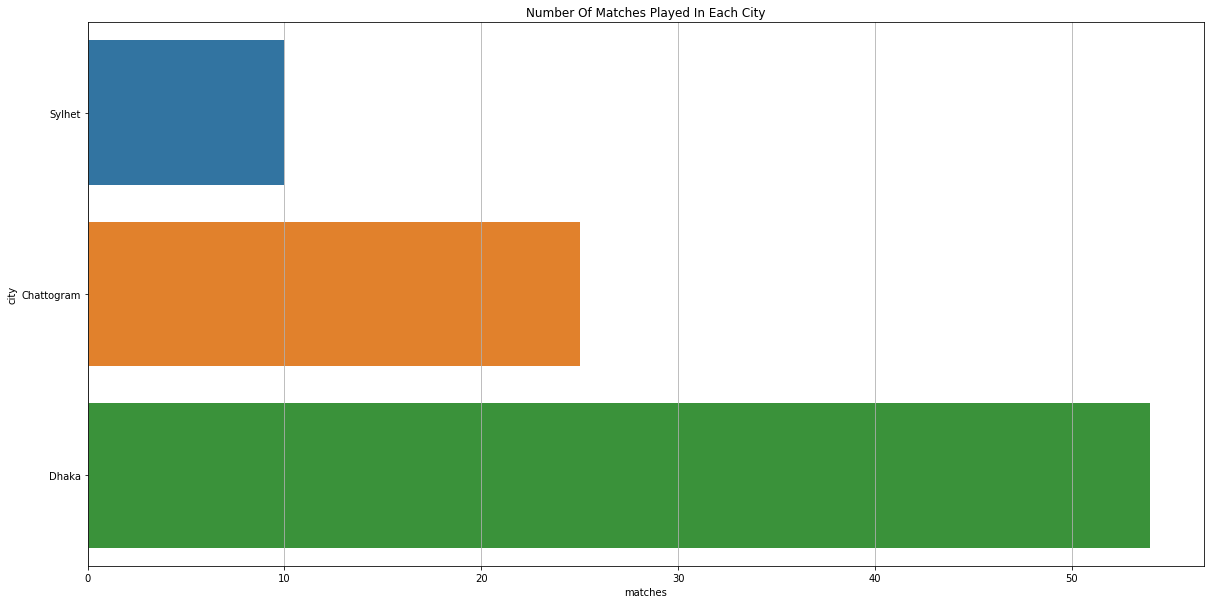

In [ ]:
plt.figure(figsize=(20,10))
plt.grid()
plt.title('Number Of Matches Played In Each City')
sns.barplot(x='matches',y='city',data=cities);

In [ ]:
BPL_df.winner.unique()

array(['Chattogram Challengers', 'Cumilla Warriors', 'Rajshahi Royales',
       'Khulna Tighers', 'Dhaka Platoon', 'Sylhet Thunder',
       'Rangpur Riders', 'Rajshahi Royals', 'Khulna Tigers',
       'Comilla Warriors', 'Dhaka Platoons', 'Rangpur Rangers',
       'Chittagong Vikings', 'Comilla Victorians', 'Dhaka Dynamites',
       'Sylhet Sixers', 'Draw', 'Rajshahi Kings', 'Khulna Titans',
       'SYLHET SIXERS', 'DHAKA DYNAMITES', 'KHULNA TITANS',
       'RAJSHAHI KINGS', 'COMILLA VICTORIANS', 'Dhaka Dynamites ',
       'RANGPUR RIDERS', 'BARISAL BULLS', 'CHITTAGONG VIKINGS'],
      dtype=object)

In [ ]:

winner_df = BPL_df.groupby('winner')[['ID']].count()
winner_df = winner_df.sort_values('ID', ascending=False).reset_index()

winner_df.rename(columns = {'ID':'wins','winner':'Teams'},inplace=True)
winner_df

,Teams,wins
0,Chattogram Challengers,9
1,DHAKA DYNAMITES,7
2,RANGPUR RIDERS,7
3,Khulna Tighers,5
4,Dhaka Dynamites,5
5,Dhaka Platoon,5
6,Rajshahi Royales,5
7,KHULNA TITANS,4
8,Rangpur Riders,4
9,Cumilla Warriors,4


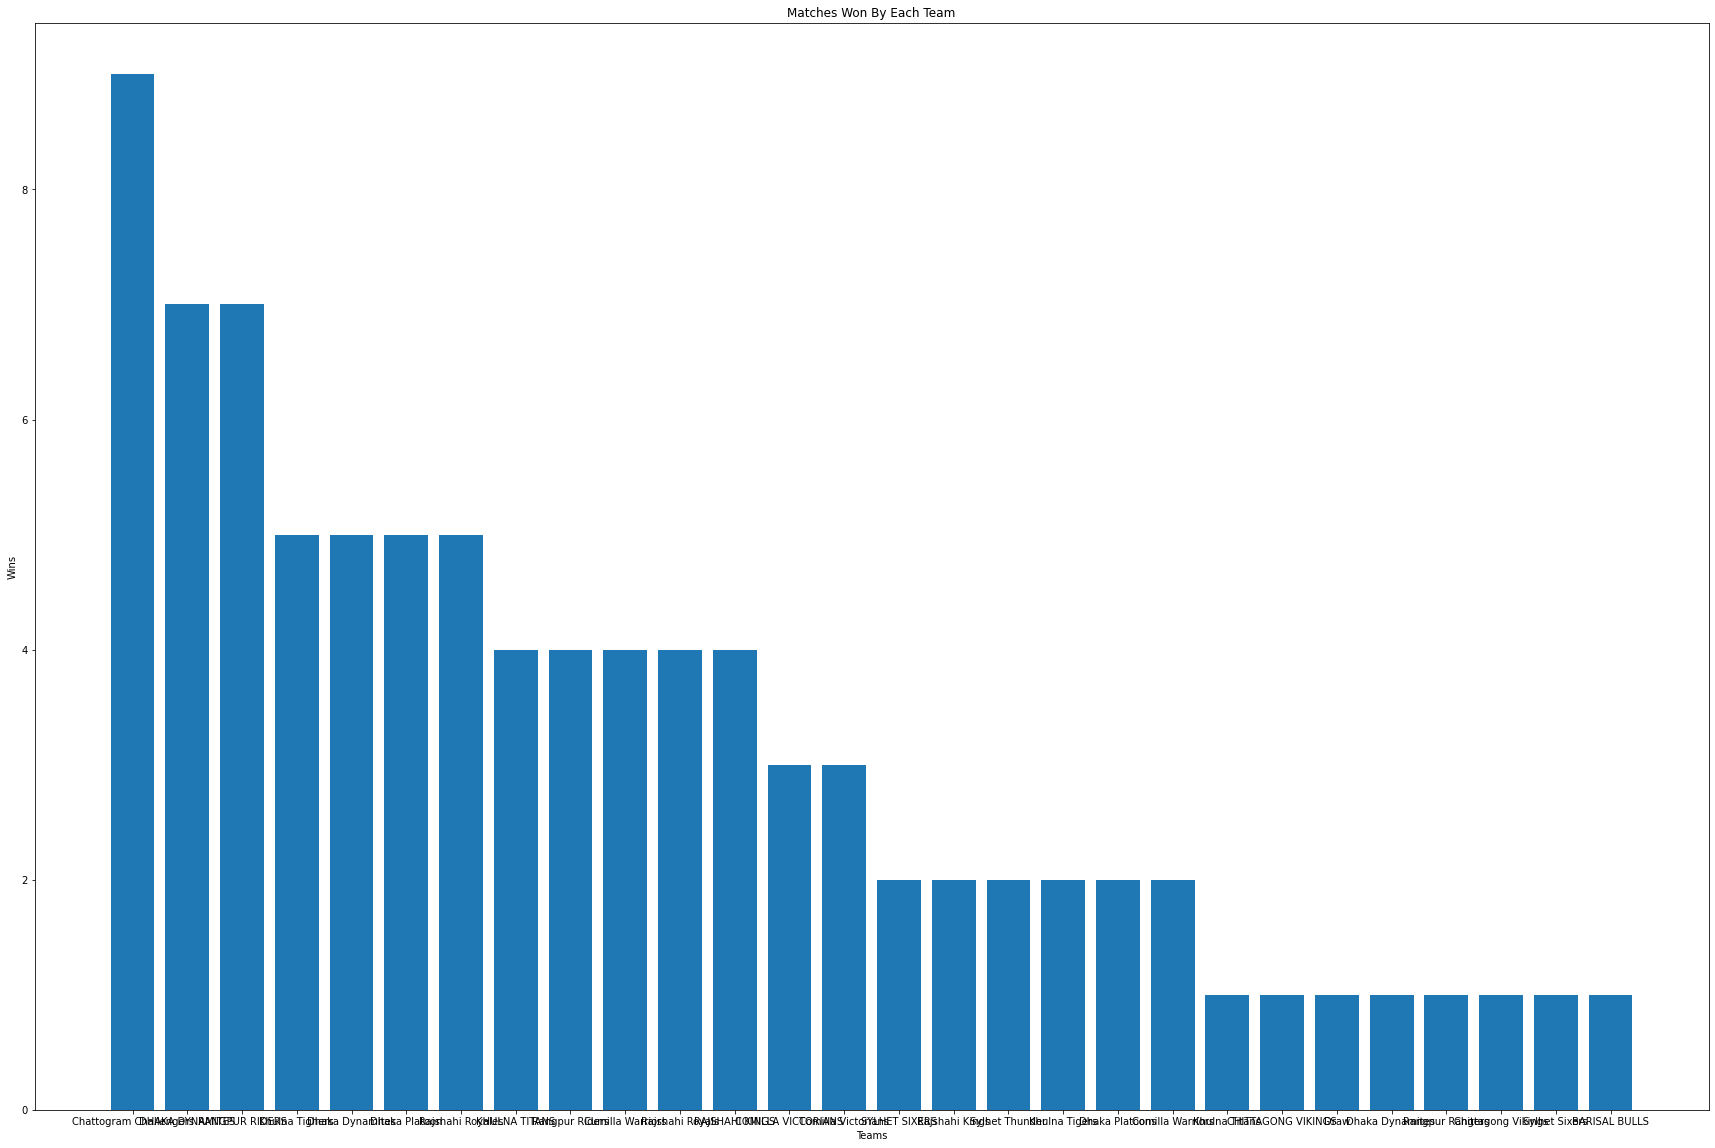

In [ ]:
#Plotting Wins vs Teams
plt.figure(figsize=(30,20))
plt.xlabel('Teams')
plt.ylabel('Wins')
plt.title('Matches Won By Each Team');
plt.bar(winner_df.Teams,winner_df.wins);

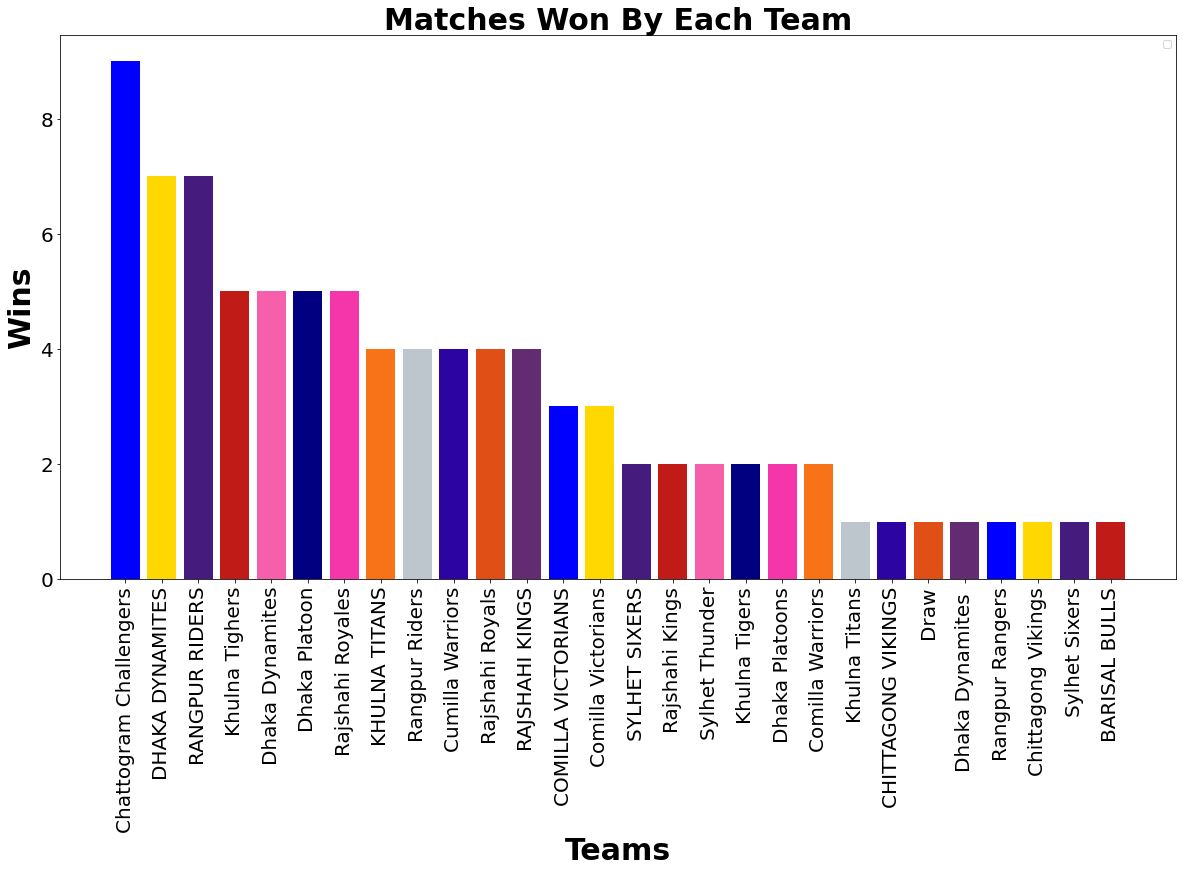

In [ ]:
#Plotting Wins vs Teams
#We will be using colour code of teams jersey to make it easily understandable
plt.figure(figsize=(20,10))
plt.legend(winner_df.Teams,loc=1)
plt.xlabel('Teams',fontweight='bold',fontsize=30)
plt.ylabel('Wins',fontweight='bold',fontsize=30)
plt.tick_params(labelsize=20)
plt.xticks(rotation=90)
plt.title('Matches Won By Each Team',fontweight='bold',fontsize=30);
plt.bar(winner_df.Teams, winner_df.wins, color = ['blue','#FFD801','#461B7E','#C11B17','#F660AB','#000080','#F535AA','#F87217','#BCC6CC','#2C04A2','#E04F16','#632B72']);

In [ ]:
season_df = BPL_df.groupby('season')[['ID']].count()
season_df = season_df.sort_values('season', ascending=False).reset_index()
season_df.rename(columns = {'ID':'Matches','season':'Year'},inplace = True)

In [ ]:
season_df

,Year,Matches
0,2020,30
1,2019,15
2,2018,14
3,2017,16
4,2016,14


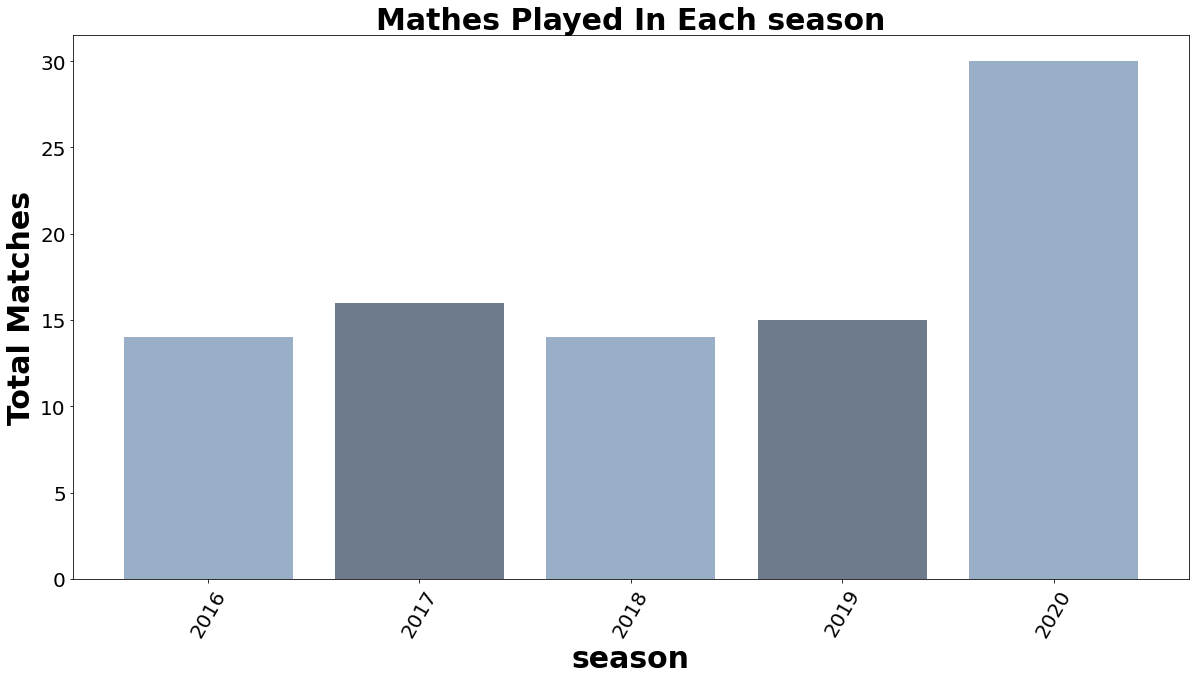

In [ ]:
#To make it look more neat we will rotate the x-axis name with an angle of 60 using .xticks() method
# Also will make the font bold and increase its size for readability
plt.figure(figsize=(20,10))
plt.title("Mathes Played In Each season",fontweight='bold',fontsize=30)
plt.xlabel('season',fontweight='bold',fontsize=30)
plt.ylabel('Total Matches',fontweight='bold',fontsize=30)
plt.xticks(rotation='60')
plt.tick_params(labelsize=20)
plt.bar(season_df.Year,season_df.Matches,color=['#98AFC7','#6D7B8D']);

In [ ]:
BPL_df

,ID,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2020,Dhaka,11/12/2019,Sylhet Thunder,Chattogram Challengers,Chattogram Challengers,Field,Normal,0,Chattogram Challengers,0.0,5.0,Imrul Kayes,Sher-e-Bangla National Cricket
1,2,2020,Dhaka,11/12/2019,Cumilla Warriors,Rangpur Riders,Cumilla Warriors,Bat,Normal,0,Cumilla Warriors,105.0,0.0,Dasun Shanaka,Sher-e-Bangla National Cricket
2,3,2020,Dhaka,12/12/2019,Dhaka Platoon,Rajshahi Royales,Rajshahi Royales,Field,Normal,0,Rajshahi Royales,0.0,9.0,Ravi Bopara,Sher-e-Bangla National Cricket
3,4,2020,Dhaka,12/12/2019,Chattogram Challengers,Khulna Tighers,Khulna Tighers,Field,Normal,0,Khulna Tighers,0.0,8.0,Rilee Rossouw,Sher-e-Bangla National Cricket
4,5,2020,Dhaka,13/12/2019,Sylhet Thunder,Anamul Haque,Rajshahi Royales,Field,Normal,0,Rajshahi Royales,0.0,5.0,Alok Kapali,Sher-e-Bangla National Cricket
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,85,2016,Chattogram,"19 Nov,2016",DHAKA DYNAMITES,KHULNA TITANS,Khulna Titans,Bat,Normal,0,KHULNA TITANS,9.0,0.0,Mosharraf Hossain,"Zahur Ahmed Chowdhury Stadium, Chattogram"
85,86,2016,Dhaka,"6 Dec,2016",CHITTAGONG VIKINGS,RAJSHAHI KINGS,Rajshahi Kings,Field,Normal,0,RAJSHAHI KINGS,0.0,3.0,Daren Sammy,"Shere Bangla National Stadium, Dhaka"
86,87,2016,Dhaka,"6 Dec,2016",DHAKA DYNAMITES,KHULNA TITANS,Khulna Titans,Field,Normal,0,DHAKA DYNAMITES,54.0,0.0,Andre Russell,"Sher-e Bangla National Stadium, Dhaka"
87,88,2016,Dhaka,"7 Dec,2016",KHULNA TITANS,RAJSHAHI KINGS,Khulna Titans,Bat,Normal,0,RAJSHAHI KINGS,0.0,7.0,Samit Patel,"Sher-e Bangla National Stadium, Dhaka"


In [ ]:
# We can see toss decision is either bat/field
BPL_df.toss_decision.unique()

array(['Field', 'Bat'], dtype=object)

In [ ]:
decision_df = BPL_df.groupby('toss_decision')[['ID']].count()
decision_df = decision_df.sort_values('ID').reset_index()
decision_df.rename(columns={'ID':'Total','toss_decision':'Decision'},inplace=True)

In [ ]:
decision_df

,Decision,Total
0,Bat,19
1,Field,70


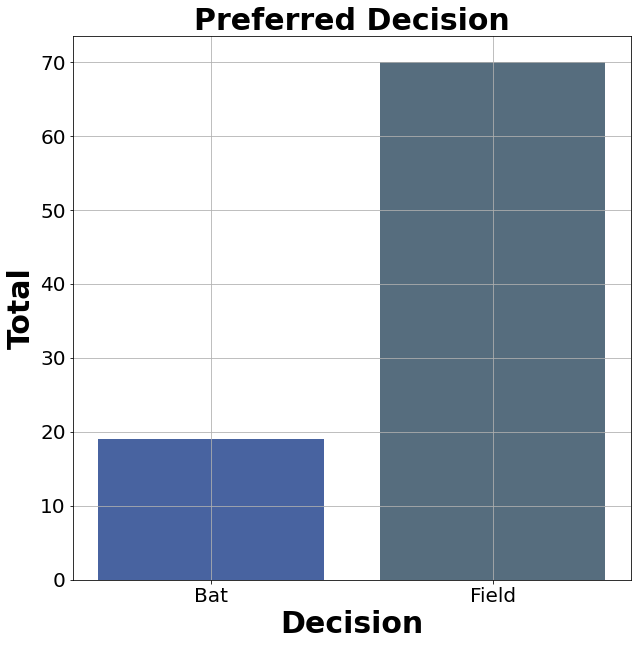

In [ ]:

#Lets plot the Result
plt.figure(figsize=(10,10))
plt.title("Preferred Decision",fontweight='bold',fontsize=30)
plt.xlabel('Decision',fontweight='bold',fontsize=30)
plt.ylabel('Total',fontweight='bold',fontsize=30)
plt.tick_params(labelsize=20)
plt.grid()
plt.bar(decision_df.Decision, decision_df.Total, color=['#4863A0','#566D7E']);

In [ ]:
print('The Most Preferred Decision After Winning Toss in the IPL Until 2019 has been "Choose to Field First"')

The Most Preferred Decision After Winning Toss in the IPL Until 2019 has been "Choose to Field First"


In [ ]:
Field_df = BPL_df.loc[(BPL_df['toss_winner'] == BPL_df['winner']) & (BPL_df['toss_decision'] == 'Field'), ['ID', 'winner','toss_decision']]

In [ ]:
Field_df.winner.count()

31

In [ ]:
Bat_df = BPL_df.loc[(BPL_df['toss_winner'] == BPL_df['winner']) & (BPL_df['toss_decision'] == 'Bat'), ['ID', 'winner','toss_decision']]

In [ ]:
Bat_df.winner.count()

7

In [ ]:
frames = [Bat_df, Field_df]
result_df = pd.concat(frames)
result_df = result_df.groupby('toss_decision')[['ID']].count()
result_df

,ID
toss_decision,
Bat,7
Field,31


In [ ]:
# Now Lets Plot the New Understanding Regarding the Success of these decisions
result_df = result_df.sort_values('ID').reset_index()
result_df.rename(columns={'ID':'Total','toss_decision':'Decision'},inplace=True)
result_df

,Decision,Total
0,Bat,7
1,Field,31


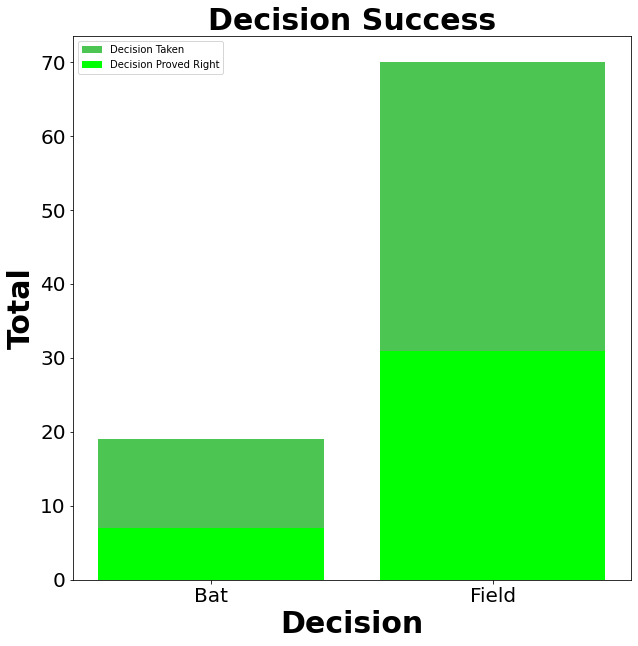

In [ ]:

plt.figure(figsize=(10,10))
plt.title("Decision Success",fontweight='bold',fontsize=30)
plt.xlabel('Decision',fontweight='bold',fontsize=30)
plt.ylabel('Total',fontweight='bold',fontsize=30)
plt.tick_params(labelsize=20)
plt.bar(decision_df.Decision, decision_df.Total, color=['#4CC552','#4CC552']);
plt.bar(result_df.Decision, result_df.Total, color=['#00FF00','#00FF00']);
plt.legend(['Decision Taken','Decision Proved Right']);

In [ ]:
# Lets see how many venues have hosted the Ipl Matches
BPL_df.venue.unique()

array(['Sher-e-Bangla National Cricket', 'Zahur Ahmed Chowdhury Stadium',
       'Sylhet International Cricket Stadium',
       'Shere Bangla National Stadium',
       'Sylhet International Cricket Stadiu',
       'Sher-e Bangla National Stadium, Dhaka',
       'Zahur Ahmed Chowdhury Stadium, Chattogram',
       'Shere Bangla National Stadium, Dhaka'], dtype=object)

In [ ]:
total_venue = list(BPL_df.venue.unique())
len(total_venue)

8

In [ ]:
venue_df = BPL_df.groupby('venue')[['ID']].count()
venue_df = venue_df.sort_values('ID',ascending=False).reset_index()
venue_df.rename(columns={'ID':'Total','venue':'Stadium'},inplace=True)

In [ ]:
labels = list(venue_df.Stadium)
venue_df

,Stadium,Total
0,Shere Bangla National Stadium,28
1,Zahur Ahmed Chowdhury Stadium,22
2,Sher-e-Bangla National Cricket,16
3,"Sher-e Bangla National Stadium, Dhaka",10
4,Sylhet International Cricket Stadium,8
5,"Zahur Ahmed Chowdhury Stadium, Chattogram",3
6,"Shere Bangla National Stadium, Dhaka",1
7,Sylhet International Cricket Stadiu,1


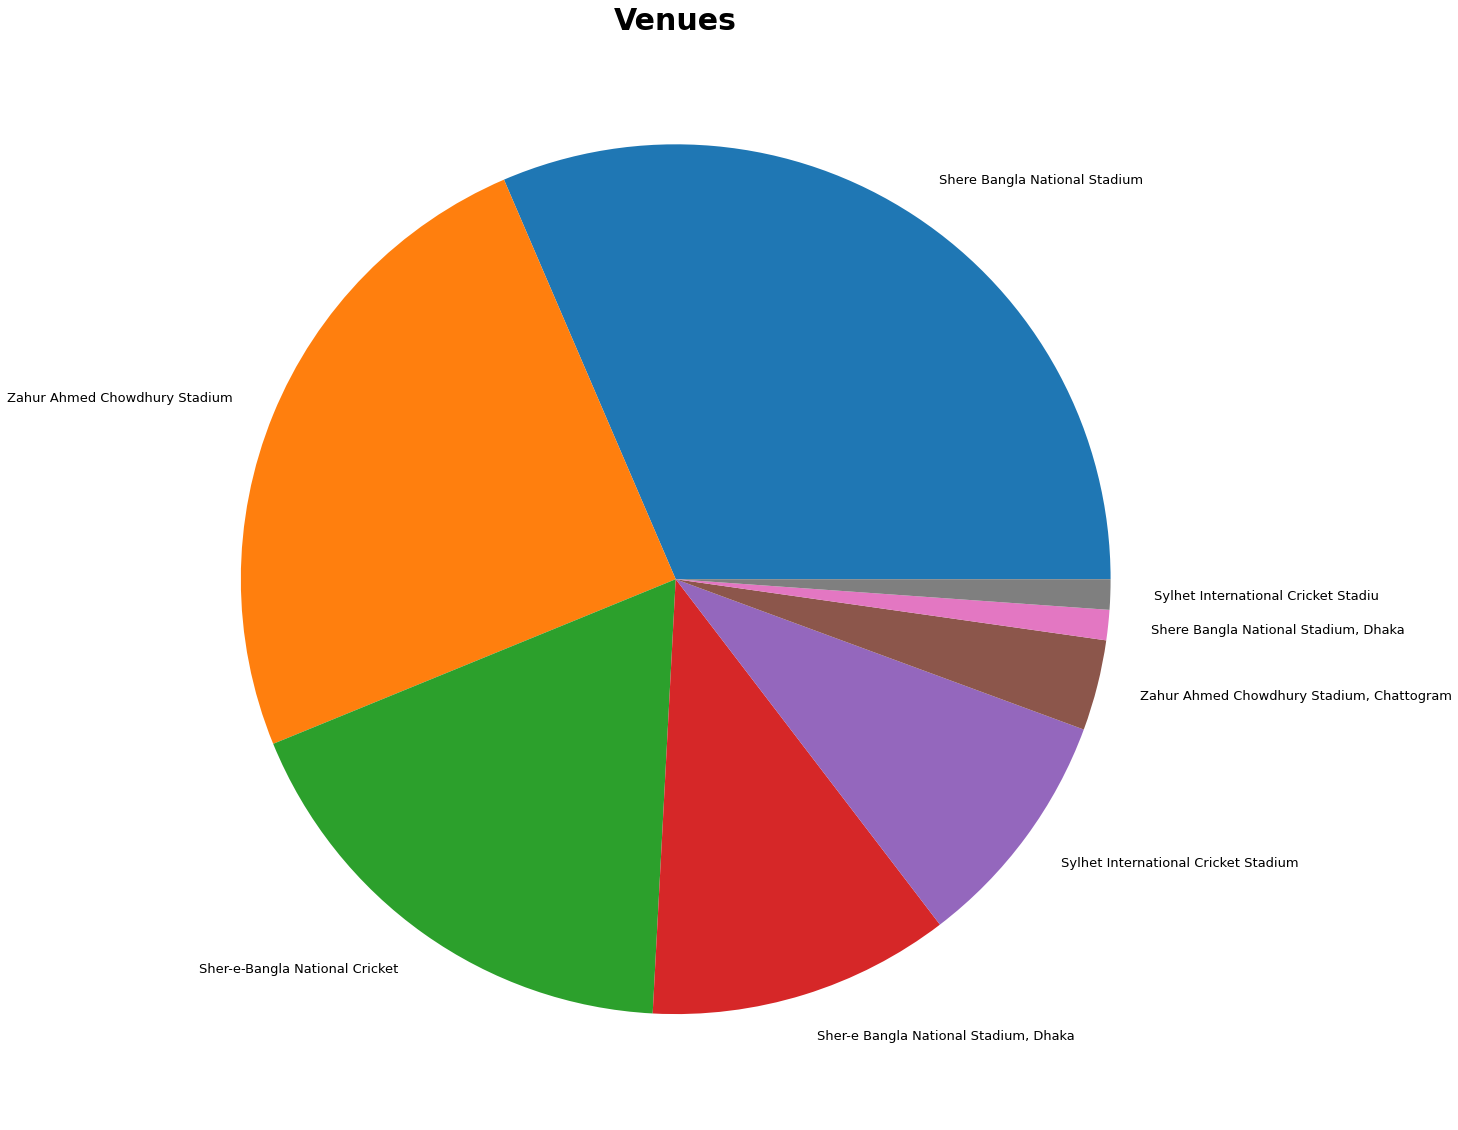

In [ ]:
plt.figure(figsize=(20,20))
plt.title("Venues",fontweight='bold',fontsize=30)
plt.tick_params(labelsize=40)
plt.pie(venue_df.Total,labels=labels,textprops={'fontsize': 13});

In [ ]:
#Lets Check how many players have been awarded with player of the match award
len(BPL_df.player_of_match.unique())

58

In [ ]:
player_df = BPL_df.groupby('player_of_match')[['ID']].count()

In [ ]:
player_df

,ID
player_of_match,
Al Islam,1
Alok Kapali,1
Alok Kopali,1
Anamul Haque,1
Andre Fletcher,2
Andre Russell,2
Arafat Sunny,1
Cameron Delport,1
Chadwick Walton,1


In [ ]:
player_df = player_df.sort_values('ID',ascending=False).reset_index()

In [ ]:
player_df

,player_of_match,ID
0,Imrul Kayes,5
1,Dawid Malan,5
2,Mahmudullah,4
3,Mahedi Hasan,4
4,Shahid Afridi,3
5,Shoaib Malik,2
6,Mehedi Hasan Rana,2
7,Shafiul Islam,2
8,Lewis Gregory,2
9,Mohammad Nabi,2


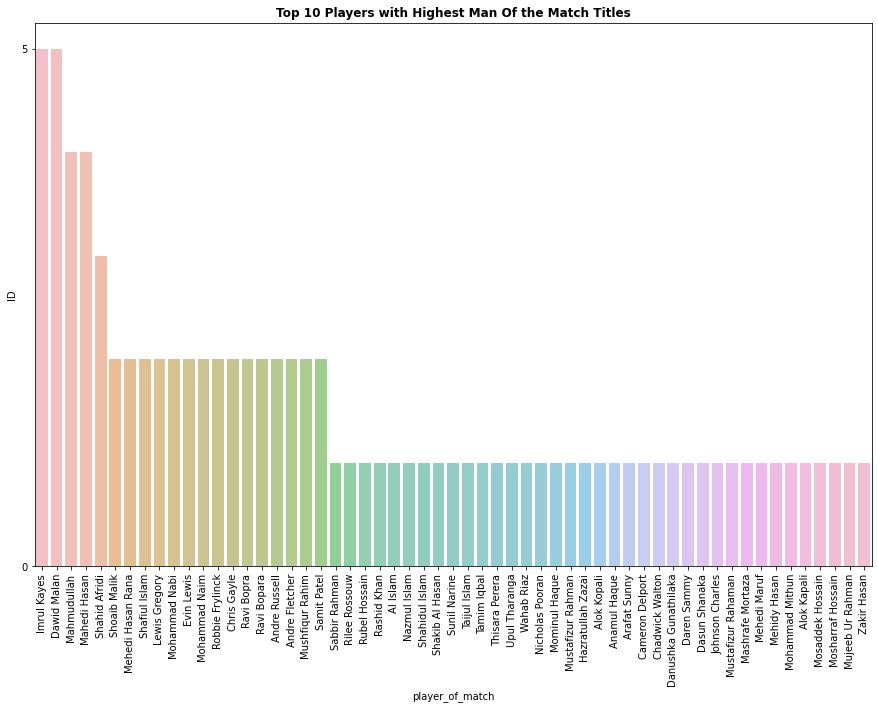

In [ ]:

plt.figure(figsize=(15,10))
plt.title("Top 10 Players with Highest Man Of the Match Titles",fontweight='bold' )
plt.xticks(rotation=90)
plt.yticks(ticks=np.arange(0,25,5))
plt.ylabel('No. of Awards')
plt.xlabel('Players')
sns.barplot(x=player_df.player_of_match,y=player_df.ID, alpha=0.6);

In [ ]:
final_df = BPL_df.groupby('season').tail(1).copy()

In [ ]:
final_df


,ID,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
29,30,2020,Sylhet,2/1/2020,Cumilla Warriors,Sylhet Thunder,Sylhet Thunder,Field,Super Over,0,Cumilla Warriors,0.0,0.0,Mujeeb Ur Rahman,Sylhet International Cricket Stadium
44,45,2019,Sylhet,"Jan 2,2020",Rajshahi Royals,Rangpur Rangers,Rangpur Rangers,Field,Normal,0,Rajshahi Royals,30.0,0.0,Ravi Bopra,Sylhet International Cricket Stadium
58,59,2018,Dhaka,"Feb 8,2019",Rangpur Riders,Dhaka Dynamites,Dhaka Dynamites,Field,Normal,0,Comilla Victorians,17.0,0.0,Tamim Iqbal,Shere Bangla National Stadium
74,75,2017,Dhaka,"12 Dec,2917",DHAKA DYNAMITES,RANGPUR RIDERS,Dhaka Dynamites,Field,Normal,0,RANGPUR RIDERS,57.0,0.0,Chris Gayle,Shere Bangla National Stadium
88,89,2016,Dhaka,"9 Nov,2016",DHAKA DYNAMITES,RAJSHAHI KINGS,Rajshahi Kings,Field,Normal,0,DHAKA DYNAMITES,56.0,0.0,Mahmudullah,"Sher-e Bangla National Stadium, Dhaka"


In [ ]:
#Now Lets sort The Data According to Seasons
final_df = final_df.sort_values('season')
final_df

,ID,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
88,89,2016,Dhaka,"9 Nov,2016",DHAKA DYNAMITES,RAJSHAHI KINGS,Rajshahi Kings,Field,Normal,0,DHAKA DYNAMITES,56.0,0.0,Mahmudullah,"Sher-e Bangla National Stadium, Dhaka"
74,75,2017,Dhaka,"12 Dec,2917",DHAKA DYNAMITES,RANGPUR RIDERS,Dhaka Dynamites,Field,Normal,0,RANGPUR RIDERS,57.0,0.0,Chris Gayle,Shere Bangla National Stadium
58,59,2018,Dhaka,"Feb 8,2019",Rangpur Riders,Dhaka Dynamites,Dhaka Dynamites,Field,Normal,0,Comilla Victorians,17.0,0.0,Tamim Iqbal,Shere Bangla National Stadium
44,45,2019,Sylhet,"Jan 2,2020",Rajshahi Royals,Rangpur Rangers,Rangpur Rangers,Field,Normal,0,Rajshahi Royals,30.0,0.0,Ravi Bopra,Sylhet International Cricket Stadium
29,30,2020,Sylhet,2/1/2020,Cumilla Warriors,Sylhet Thunder,Sylhet Thunder,Field,Super Over,0,Cumilla Warriors,0.0,0.0,Mujeeb Ur Rahman,Sylhet International Cricket Stadium


In [ ]:
final_df.winner.unique()

array(['DHAKA DYNAMITES', 'RANGPUR RIDERS', 'Comilla Victorians',
       'Rajshahi Royals', 'Cumilla Warriors'], dtype=object)

In [ ]:
final_df['winner'].value_counts()

Rajshahi Royals       1
Cumilla Warriors      1
Comilla Victorians    1
RANGPUR RIDERS        1
DHAKA DYNAMITES       1
Name: winner, dtype: int64

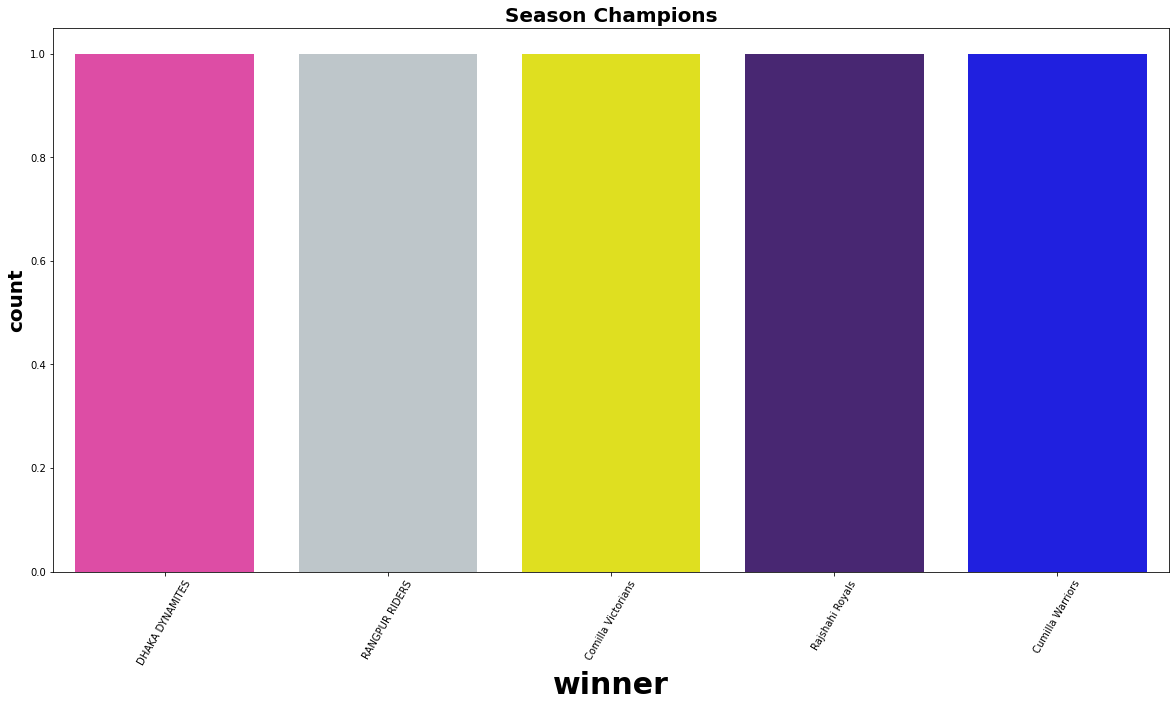

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Season Champions",fontweight='bold',fontsize=20)
plt.xlabel('Teams',fontweight='bold',fontsize=30)
plt.ylabel('Total Seasons',fontweight='bold',fontsize=20)
plt.xticks(rotation='60')
plt.tick_params(labelsize=10)
sns.countplot(x=final_df['winner'],palette=['#F535AA','#BCC6CC','yellow','#461B7E','blue','#F87217']);

In [ ]:
#This we had Explored Earlier
season_df

,Year,Matches
0,2020,30
1,2019,15
2,2018,14
3,2017,16
4,2016,14


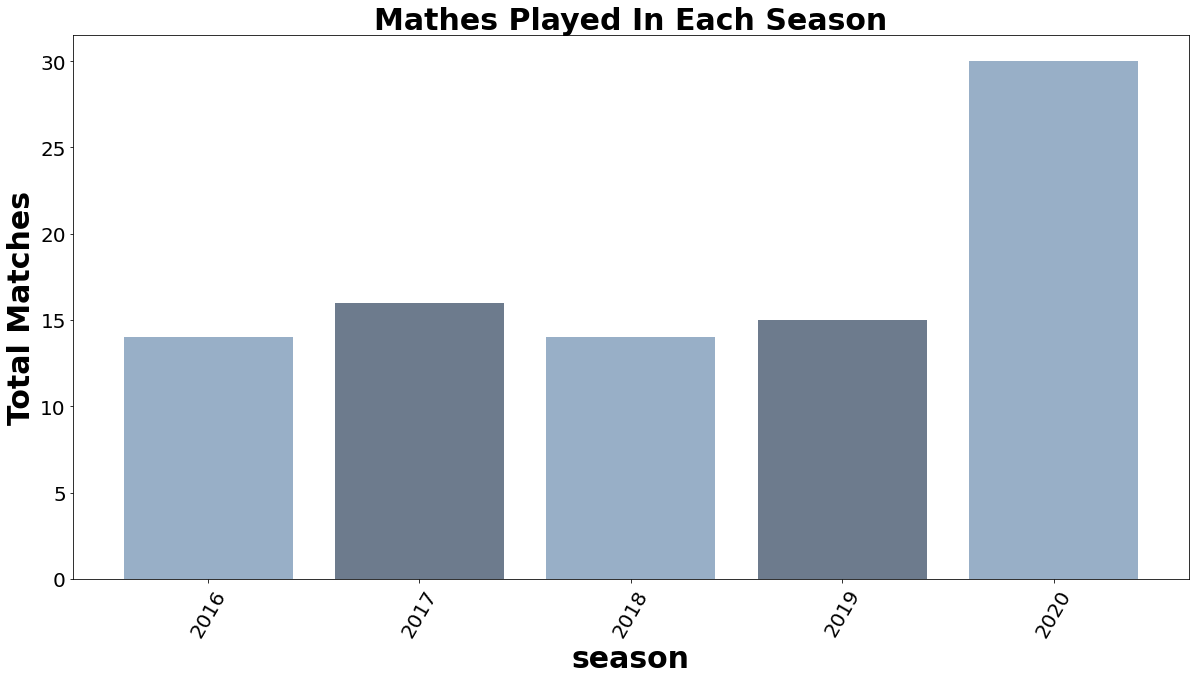

In [ ]:
#To make it look more neat we will rotate the x-axis name with an angle of 60 using .xticks() method
# Also will make the font bold and increase its size for readability
plt.figure(figsize=(20,10))
plt.title("Mathes Played In Each Season",fontweight='bold',fontsize=30)
plt.xlabel('season',fontweight='bold',fontsize=30)
plt.ylabel('Total Matches',fontweight='bold',fontsize=30)
plt.xticks(rotation='60')
plt.tick_params(labelsize=20)
plt.bar(season_df.Year,season_df.Matches,color=['#98AFC7','#6D7B8D']);